       X         Z     W
0   0.05  0.866667  0.95
1   0.10  0.806275  0.90
2   0.15  0.773899  0.85
3   0.20  0.540958  0.80
4   0.25  0.416239  0.75
5   0.30  0.367729  0.70
6   0.35  0.380615  0.65
7   0.40  0.427439  0.60
8   0.45  0.538983  0.55
9   0.50  0.346154  0.50
10  0.90  0.464443  0.10


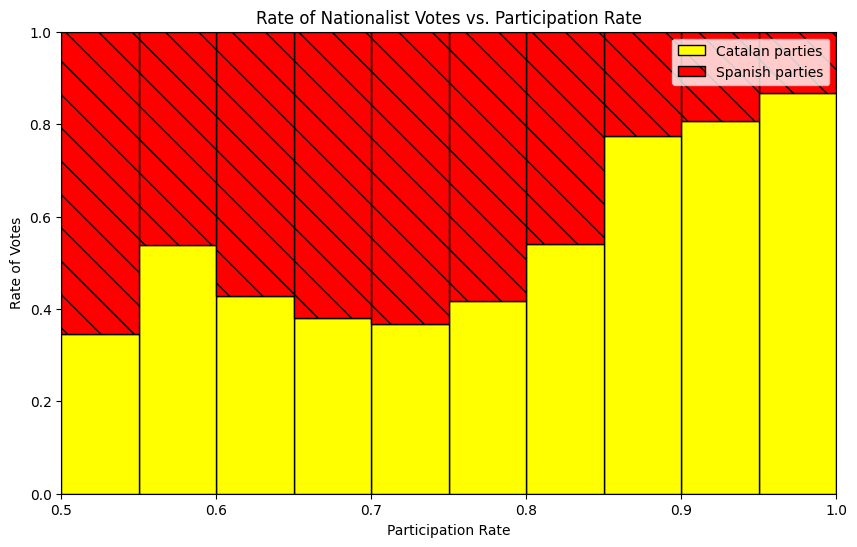

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

# Cargar el archivo CSV
archivo_csv = r'/mnt/c/Users/ARNAL_TRESPALLE/Desktop/2023-BigDataVisualization-jose/data/G20192-Columnes-ME-EN.csv' 
datos = pd.read_csv(archivo_csv, sep=';')

datos = datos.groupby(by=datos["Municipality_name"], as_index=False).sum()

# Calcular la tasa de abstención y la fracción de votos nacionalistas para cada mesa electoral
datos['Tasa_Abstencion'] = datos['Abstention'] / datos['Electoral_census']
datos['Fraccion_Votos_Nacionalistas'] = (datos['ERC_votes'] + datos['JUNTS_votes'] + datos['CUP_votes']) / datos['Valid_votes']

limites = [i * 0.05 for i in range(0, 21)]  # de 0 a 1 con incrementos de 0.02

# Agrupar las mesas electorales según la tasa de abstención
datos['Grupo_Abstencion'] = pd.cut(datos['Tasa_Abstencion'], bins=limites, labels=False, include_lowest=True)

# Crear un nuevo DataFrame con límites inferiores de intervalos y fracción de mesas con "fracción de votos nacionalistas" > 0.5
nuevo_df = pd.DataFrame()

# Obtener límites inferiores de intervalos
nuevo_df['X'] = datos.groupby('Grupo_Abstencion')['Tasa_Abstencion'].min().apply(lambda x: int(x / 0.05) * 0.05)

# Obtener la suma de 'ERC_votes', 'JUNTS_votes', 'CUP_votes' y 'Valid_votes' para cada grupo
suma_votos = datos.groupby('Grupo_Abstencion')[['ERC_votes', 'JUNTS_votes', 'CUP_votes', 'Valid_votes']].sum()

# Calcular la variable 'Z'
nuevo_df['Z'] = suma_votos['ERC_votes'] + suma_votos['JUNTS_votes'] + suma_votos['CUP_votes']
nuevo_df['Z'] /= suma_votos['Valid_votes']

# Calcular la variable 'W'
nuevo_df['W'] = 1 - nuevo_df['X']

# Reiniciar los índices para que 'Grupo_Abstencion' sea una columna en lugar de un índice
nuevo_df.reset_index(drop=True, inplace=True)

# Mostrar el nuevo DataFrame
print(nuevo_df)

# Crear el plot de W frente a X
plt.figure(figsize=(10, 6))
plt.bar(nuevo_df['W'], nuevo_df['Z'], width=0.05, color='yellow', align='edge', edgecolor='black', label = 'Catalan parties')
plt.bar(nuevo_df['W'], 1 - nuevo_df['Z'], bottom=nuevo_df['Z'], width=0.05, color='red', align='edge', edgecolor='black', label='Spanish parties', hatch='\\')

# Ajustar el rango del eje X
plt.xlim(0.5, 1.0)
plt.ylim(0.0, 1.0)


# Añadir etiquetas y título
plt.title('Rate of Nationalist Votes vs. Participation Rate')
plt.xlabel('Participation Rate')
plt.ylabel('Rate of Votes')

# Configurar el grid por debajo de los bins
plt.gca().set_axisbelow(True)
plt.grid(True, linestyle='--', alpha=0.7)

# Añadir leyenda
plt.legend()

plt.show()















